# CodeChallenge: Fixed vs. Dynamic Learning Rate
This Document will cover:
- Learn that the model learning rate does not need to have a static value
- Think about different ways to change the learning rate, and when certain mathods can fail

In [22]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [23]:
# Define a Range for x
x = np.linspace(-2, 2, 2001)

# Function (as a function)
def fx(x):
    return 3*x**2 - 3*x + 4

# Derivative Function
def deriv(x):
    return 6*x - 3

### G.D. using a fixed learning rate

In [24]:
# Random Starting Point
localmin = np.random.choice(x,1)
initval = localmin[:] # Store the Initial Value

# Learning Parameters
learning_rate = .01
training_epochs = 50

# Set Loop Iterations to 0, Run through training and store all the results
i=0; ii=0;
modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
    # compute gradient
    grad = deriv(localmin)

    # non-adaptive learning rate
    lr = learning_rate

    # update parameter according to g.d.
    localmin = localmin - lr*grad

    # store the parameters
    modelparamsFixed[i,0] = localmin
    modelparamsFixed[i,1] = grad
    modelparamsFixed[i,2] = lr
print(modelparamsFixed)

[[1.76336    8.064      0.01      ]
 [1.6875584  7.58016    0.01      ]
 [1.6163049  7.1253504  0.01      ]
 [1.5493266  6.69782938 0.01      ]
 [1.48636701 6.29595961 0.01      ]
 [1.42718499 5.91820204 0.01      ]
 [1.37155389 5.56310991 0.01      ]
 [1.31926065 5.22932332 0.01      ]
 [1.27010501 4.91556392 0.01      ]
 [1.22389871 4.62063009 0.01      ]
 [1.18046479 4.34339228 0.01      ]
 [1.1396369  4.08278874 0.01      ]
 [1.10125869 3.83782142 0.01      ]
 [1.06518317 3.60755213 0.01      ]
 [1.03127218 3.39109901 0.01      ]
 [0.99939585 3.18763307 0.01      ]
 [0.9694321  2.99637508 0.01      ]
 [0.94126617 2.81659258 0.01      ]
 [0.9147902  2.64759702 0.01      ]
 [0.88990279 2.4887412  0.01      ]
 [0.86650862 2.33941673 0.01      ]
 [0.8445181  2.19905172 0.01      ]
 [0.82384702 2.06710862 0.01      ]
 [0.8044162  1.9430821  0.01      ]
 [0.78615122 1.82649718 0.01      ]
 [0.76898215 1.71690735 0.01      ]
 [0.75284322 1.61389291 0.01      ]
 [0.73767263 1.51705933 0.01

C:\Users\xande\AppData\Local\Temp\ipykernel_1176\211416042.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,0] = localmin
C:\Users\xande\AppData\Local\Temp\ipykernel_1176\211416042.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,1] = grad


#### G.D. using gradient-based learning rate

In [25]:
# Random Starting Point
localmin = np.random.choice(x,1)
initval = locmin2[:]

# Learning Parameters
learning_rate = .01
training_epochs = 50

# Set Loop Iterations to 0, Run through training and store all the results
i=0; ii=0;
modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):

    # compute gradient
    grad = deriv(localmin)

    # adapt the learning rate according to the gradient
    lr = learning_rate*np.abs(grad)

    # update parameter according to g.d.
    localmin = localmin - lr*grad

    # store the parameters
    modelparamsGrad[i,0] = localmin
    modelparamsGrad[i,1] = grad
    modelparamsGrad[i,2] = lr
print(modelparamsGrad)

[[1.10340144e+00 5.31600000e+00 5.31600000e-02]
 [9.72327853e-01 3.62040864e+00 3.62040864e-02]
 [8.92014157e-01 2.83396712e+00 2.83396712e-02]
 [8.36691121e-01 2.35208494e+00 2.35208494e-02]
 [7.95881193e-01 2.02014673e+00 2.02014673e-02]
 [7.64364748e-01 1.77528716e+00 1.77528716e-02]
 [7.39204809e-01 1.58618849e+00 1.58618849e-02]
 [7.18605990e-01 1.43522885e+00 1.43522885e-02]
 [7.01402102e-01 1.31163594e+00 1.31163594e-02]
 [6.86799491e-01 1.20841261e+00 1.20841261e-02]
 [6.74237633e-01 1.12079695e+00 1.12079695e-02]
 [6.63308482e-01 1.04542580e+00 1.04542580e-02]
 [6.53707405e-01 9.79850894e-01 9.79850894e-03]
 [6.45202057e-01 9.22244428e-01 9.22244428e-03]
 [6.37611947e-01 8.71212341e-01 8.71212341e-03]
 [6.30794610e-01 8.25671684e-01 8.25671684e-03]
 [6.24636007e-01 7.84767660e-01 7.84767660e-03]
 [6.19043719e-01 7.47816044e-01 7.47816044e-03]
 [6.13942012e-01 7.14262313e-01 7.14262313e-03]
 [6.09268211e-01 6.83652074e-01 6.83652074e-03]
 [6.04969976e-01 6.55609265e-01 6.556092

C:\Users\xande\AppData\Local\Temp\ipykernel_1176\258832077.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,0] = localmin
C:\Users\xande\AppData\Local\Temp\ipykernel_1176\258832077.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,1] = grad
C:\Users\xande\AppData\Local\Temp\ipykernel_1176\258832077.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,2] = lr


#### G.D. using a time-based learning rate

In [26]:
# redefine parameters
learning_rate = .1
localmin = initval

# run through training and store all the results
modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate*(1-(i+1)/training_epochs)
  localmin = localmin - lr*grad
  modelparamsTime[i,0] = localmin
  modelparamsTime[i,1] = grad
  modelparamsTime[i,2] = lr

C:\Users\xande\AppData\Local\Temp\ipykernel_1176\287006009.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,0] = localmin
C:\Users\xande\AppData\Local\Temp\ipykernel_1176\287006009.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,1] = grad


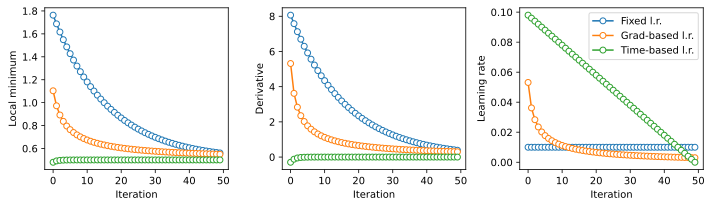

In [27]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

# generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()